# Creating your own dataset from Google Images

###  Content
- Download thumbnails screenshots (w/o scrolling) 
- Download thumbnails (original) with scrolling
- Download source images (full size) with scrolling


 

## Selenium 

Install up to date web driver 

[Current Releases](https://chromedriver.chromium.org/downloads)



#  Install web driver

- Determine Chrome version
    (Version 94.0.4606.71)
- Download corresponding web driver
- Check Selenium is working 

### Check Selenium is working 

In [2]:
pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 9.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.2/460.2 kB 9.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0
  Attempting uninstall: sniffio
    Found existing installation: sniffio 1.2.0
    Uninstalling sniffio-1.2.0:
      Successfully uninstalled sniffio-1.2.0
Note: you may need to restart the kernel to use updated packages.


#### Test the web driver 

Just put the driver to the current location 

In [14]:
# import selenium
from selenium import webdriver
#  Just put the driver to the current location 
# DRIVER_PATH = './chromedriver'
# wd = webdriver.Chrome(executable_path=DRIVER_PATH)
wd = webdriver.Chrome()


You should get the chrome opened in separate window

In [15]:
wd.get('https://google.com')

Now you see the google page 

In [22]:
# search_box = wd.find_element_by_css_selector('input.gLFyf') # this is obsolete. You need to update the code when running

search_box = wd.find_element("css selector", 'textarea.gLFyf')
search_box.send_keys('Dogs')

In [23]:
wd.quit()

## Scraping images from Google

You may use 2 options for scrapping images 
1) small images from for  thumbnails (images displayed by search in google)
2) source images that appear in the right side after click on thumbnail

### General approach of development this script 

Run the chrome manually or stop by input () the one created by selenium 

Copy the img class name e.g. "rg_i" for  thumbnails
e.g

```
<img data-src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8S3c0M2J63zzomg2pdfe1JmvAeOPTG_zxYw&amp;usqp=CAU" data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="183" height="136" alt="12 Best Horse Breeds - Different Horse Breeds" />
```


Copy the img class name e.g. "n3VNCb" after click 

Update corresponding code 

it uses 2 secs of sleep_between_interactions  - otherwise it returns wrong url - not the one starts with hhtp


Note: 
- You may help to scroll and "show more images" in tyhe opened window in order to avoid "input()" to expect your "enter"
- It is going to collect about 300-450 of 500 due to some cases there are only `data:image/jpeg;bas...` or `https://encrypted-tb...`


## Download thumbnails images 

This is not perfect since 
- it collects small images 
- it makes the screenshots  - Did not find the way to download the image that has srs `data:image/jpeg;...`
 
**Update**: see proper approach below  

In [40]:
import time 
wd =  webdriver.Chrome()
# sleep_between_interactions=1
search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

search_term = 'horses'

query = search_term
wd.get(search_url.format(q=query))
# results_start= 0
# thumbnail_results = wd.find_elements_by_css_selector("img.rg_i")
thumbnail_results = wd.find_elements("css selector","img.rg_i")

number_results = len(thumbnail_results)
        
print(f"Found: {number_results} search results. ")

time.sleep (5)

for i, th_n in enumerate(thumbnail_results[:5]): # lets limit for demo purpose
    fn = f'image_{search_term}_{i}.png'
    with open(fn, 'wb') as f:
        f.write(th_n.screenshot_as_png)
        time.sleep (1)
        print ('saving ', fn)
wd.quit()

Found: 48 search results. 
saving  image_horses_0.png
saving  image_horses_1.png
saving  image_horses_2.png
saving  image_horses_3.png
saving  image_horses_4.png


### Review downloaded thumbnails 

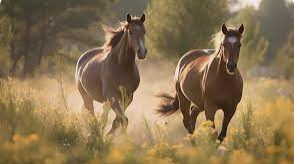

In [41]:
from IPython.display import Image

i= 5
fn = f'image_horses_{i}.png'

Image(fn)


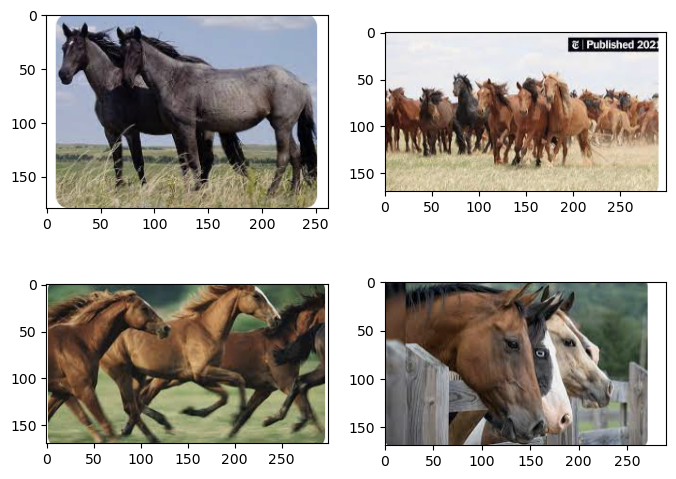

In [42]:
import matplotlib.pyplot as plt
from PIL import Image

def show_samples(files):   
        _, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize= (8,6))
        axes = (ax1, ax2, ax3, ax4)
        for i, ax in  enumerate(axes):
            img = Image.open(files[i])
            ax.imshow(img)
files = [f'image_{search_term}_{i}.png' for i in range (4)]        
show_samples(files)    


## Download thumbnails

**Note** : This is not about screenshots

If thumbnails work for you, then use this option

If you need full size images see below 

Source: [Scraping Google Image Search Result](https://medium.com/geekculture/scraping-google-image-search-result-dfe01bcbc610)

### Investigate approach

Found: 48 search results.


''
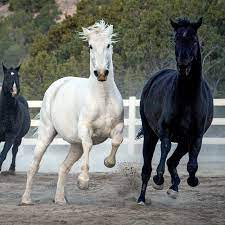

In [12]:
import time 
wd =  webdriver.Chrome(executable_path=DRIVER_PATH)
# sleep_between_interactions=1
search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

search_term = 'horses'

query = search_term
wd.get(search_url.format(q=query))
# results_start= 0
thumbnail_results = wd.find_elements_by_css_selector("img.rg_i")
number_results = len(thumbnail_results)
        
print(f"Found: {number_results} search results.")

# time.sleep (2)

# for i, th_n in enumerate(thumbnail_results):        
#     fn = f'image_{search_term}_{i}.png'
#     with open(fn, 'wb') as f:
#         f.write(th_n.screenshot_as_png)
#         time.sleep (1)
#         print ('saving ', fn)

th_n=thumbnail_results[0]

data_src = th_n.get_attribute('src')
data_src

In [14]:
import base64

my_image= data_src.split('data:image/jpeg;base64,')
fn = f'test_{search_term}.jpeg'
if(len(data_src) >1): 
    with open(fn, 'wb') as f: 
        f.write(base64.b64decode(my_image[1]))

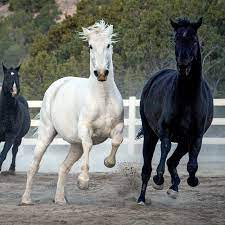

In [15]:
from IPython.display import Image
Image(fn)

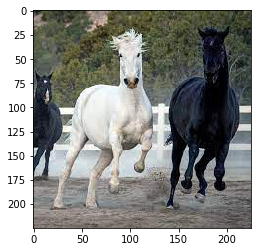

In [16]:
import matplotlib.pyplot as plt
from PIL import Image
img= Image.open(fn)
plt.imshow(img)


**Note** : Note the screenshot 

## Automate to download more thumbnails 

**Note:** It appears not all thumbnails have src as  `data:image/jpeg;base64,...` but `https...`

In [19]:
import os 
import requests

# attempt to correct scroll and image url collecting 
def scroll_to_end(wd):
    print ('scroll_to_end...')
    wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2) # wait 5sec to load more images     


    
    
    
def download_thumnails(search_term:str, driver_path:str, number_images:int, prefix='image'):
    
    # build the google query
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

    wd =  webdriver.Chrome(executable_path=DRIVER_PATH)
    
    # load the page
    wd.get(search_url.format(q=query))

    number_results_prev = 0
    while True:
        thumbnail_results = wd.find_elements_by_css_selector("img.rg_i")
        number_results = len(thumbnail_results)
        print ('found:',number_results)
        if number_results > number_images: # no need to scroll further 
            break
        if number_results_prev==number_results: # scroll does not help 
            if input('Insufficient images. Try to press "show more images" button and then "enter" here, Or print "stop" to proceed.')=='stop':
                break        
        else:
            number_results_prev=number_results
            scroll_to_end(wd)


    target_folder = os.path.join('_'.join(prefix.lower().split(' ')))
    if not os.path.exists(target_folder):
        print  ('Creating:', target_folder)
        os.makedirs(target_folder)
        
    index= 0
    downloaded_tumbnails_fns= []
    print ('\nDownloading images')
    for i, th_n in enumerate(thumbnail_results):
        fn = f'{target_folder}/{search_term}_{i}.jpeg'

        if th_n.get_attribute('src').startswith ('http') :
            url = th_n.get_attribute('src')
            print ('Download image by URL:',url)
            try: 
                img_data = requests.get(url,timeout=5).content
            except Exception as e:
                print(f"ERROR - Could not download {url} - {e}")
            else: 
                with open(fn, 'wb') as f: 
                    f.write(img_data)
                downloaded_tumbnails_fns.append(fn)
                print (f'{i}. Completed: {fn}, Collected {len(downloaded_tumbnails_fns)} of {number_images}')
        else:    
            try:             
                current_image= th_n.get_attribute('src').split('data:image/jpeg;base64,')
                if len (current_image)> 1:
                    with open(fn, 'wb') as f: 
                        f.write(base64.b64decode(current_image[1]))
                    downloaded_tumbnails_fns.append(fn)
                    print (f'{i}. Completed: {fn}, Collected {len(downloaded_tumbnails_fns)} of {number_images}')
                else: 
                    print (f'{i}. Cannot load len(image)<=1')
            except Exception as e:
                print(f"ERROR - Could not download: {e}")
        
        time.sleep (0.5)
        
        if len(downloaded_tumbnails_fns) >= number_images:
            print(f"Collected : {len(downloaded_tumbnails_fns)} thumbnails, done!")
            break # exit from for loop 
    wd.quit()
    
    return downloaded_tumbnails_fns

In [20]:

number_images= 100
search_term= 'horse'
prefix='thumbnails'# parrent folder

downloaded_tumbnails_fns= download_thumnails(
    search_term= search_term,
    driver_path = DRIVER_PATH,
    number_images=number_images,
    prefix=prefix
)
downloaded_tumbnails_fns

found: 48
scroll_to_end...
found: 100
scroll_to_end...
found: 200

0. Completed: thumbnails/horse_0.jpeg, Collected 1 of 100
1. Completed: thumbnails/horse_1.jpeg, Collected 2 of 100
2. Completed: thumbnails/horse_2.jpeg, Collected 3 of 100
3. Completed: thumbnails/horse_3.jpeg, Collected 4 of 100
4. Completed: thumbnails/horse_4.jpeg, Collected 5 of 100
5. Completed: thumbnails/horse_5.jpeg, Collected 6 of 100
6. Completed: thumbnails/horse_6.jpeg, Collected 7 of 100
7. Completed: thumbnails/horse_7.jpeg, Collected 8 of 100
8. Completed: thumbnails/horse_8.jpeg, Collected 9 of 100
9. Completed: thumbnails/horse_9.jpeg, Collected 10 of 100
10. Completed: thumbnails/horse_10.jpeg, Collected 11 of 100
11. Completed: thumbnails/horse_11.jpeg, Collected 12 of 100
12. Completed: thumbnails/horse_12.jpeg, Collected 13 of 100
13. Completed: thumbnails/horse_13.jpeg, Collected 14 of 100
14. Completed: thumbnails/horse_14.jpeg, Collected 15 of 100
15. Completed: thumbnails/horse_15.jpeg, Collec

Download image by URL: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSKAbS6k3H3X-svivGcAEbRjPfPKd682iNNEg&usqp=CAU
58. Completed: thumbnails/horse_58.jpeg, Collected 59 of 100
Download image by URL: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQezqvJNmgu8DDLt8SSa-fy0lAmjjnUgavsBQ&usqp=CAU
59. Completed: thumbnails/horse_59.jpeg, Collected 60 of 100
Download image by URL: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSHIYT4850gbbrvK-sbTR62XCdniv4ybZxQKg&usqp=CAU
60. Completed: thumbnails/horse_60.jpeg, Collected 61 of 100
Download image by URL: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR0o2P-uSR2CPZJ0v9ieajLhDLAh1IXY1sSPw&usqp=CAU
61. Completed: thumbnails/horse_61.jpeg, Collected 62 of 100
Download image by URL: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRwa-Dcs42gVy6ZZBYInyG-2Z2pf3O1F6ljpQ&usqp=CAU
62. Completed: thumbnails/horse_62.jpeg, Collected 63 of 100
Download image by URL: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFr

['thumbnails/horse_0.jpeg',
 'thumbnails/horse_1.jpeg',
 'thumbnails/horse_2.jpeg',
 'thumbnails/horse_3.jpeg',
 'thumbnails/horse_4.jpeg',
 'thumbnails/horse_5.jpeg',
 'thumbnails/horse_6.jpeg',
 'thumbnails/horse_7.jpeg',
 'thumbnails/horse_8.jpeg',
 'thumbnails/horse_9.jpeg',
 'thumbnails/horse_10.jpeg',
 'thumbnails/horse_11.jpeg',
 'thumbnails/horse_12.jpeg',
 'thumbnails/horse_13.jpeg',
 'thumbnails/horse_14.jpeg',
 'thumbnails/horse_15.jpeg',
 'thumbnails/horse_16.jpeg',
 'thumbnails/horse_17.jpeg',
 'thumbnails/horse_18.jpeg',
 'thumbnails/horse_19.jpeg',
 'thumbnails/horse_20.jpeg',
 'thumbnails/horse_21.jpeg',
 'thumbnails/horse_22.jpeg',
 'thumbnails/horse_23.jpeg',
 'thumbnails/horse_24.jpeg',
 'thumbnails/horse_25.jpeg',
 'thumbnails/horse_26.jpeg',
 'thumbnails/horse_27.jpeg',
 'thumbnails/horse_28.jpeg',
 'thumbnails/horse_29.jpeg',
 'thumbnails/horse_30.jpeg',
 'thumbnails/horse_31.jpeg',
 'thumbnails/horse_32.jpeg',
 'thumbnails/horse_33.jpeg',
 'thumbnails/horse_34.jp

## Review downloaded thumbnails 

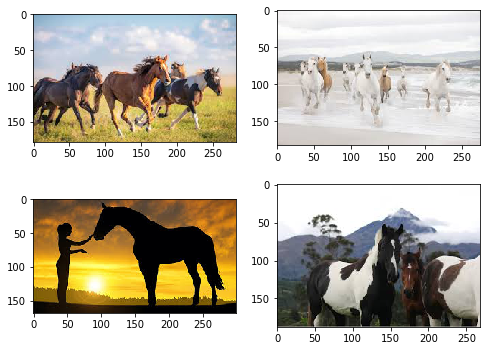

In [22]:
files = downloaded_tumbnails_fns[44:48]  # select 4 files        
show_samples(files)    


## Download source images 

In [23]:
## Try to increase image amount 

import io
import requests
       
def search_images(search_term:str, driver_path:str,number_images=5, sleep_between_interactions=1, cached_urls= set()):
    with webdriver.Chrome(executable_path=driver_path) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=sleep_between_interactions, cached_urls= cached_urls)
        print (res)
    return res         
        

In [43]:
# attempt to correct scroll and image url collecting 
def scroll_to_end(wd):
    print ('scroll_to_end...')
    wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2) # wait 5sec to load more images     


def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1, cached_urls= set()):
    # build the google query
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

    # load the page
    wd.get(search_url.format(q=query))

    number_results_prev = 0
    while True:
        thumbnail_results = wd.find_elements_by_css_selector("img.rg_i")
        number_results = len(thumbnail_results)
        print ('found:',number_results)
        if number_results > max_links_to_fetch: # no need to scroll further 
            break
        if number_results_prev==number_results: # scroll does not help 
            if input('Insufficient images. Try to press "show more images" button and then "enter" here, Or print "stop" to proceed.')=='stop':
                break
        
        else:
            number_results_prev=number_results
            scroll_to_end(wd)
    
    
    image_urls = cached_urls
    print ('Geteting images urls...')

    for img in thumbnail_results:
        # try to click every thumbnail such that we can get the real image behind it
        try:
            img.click()
        except Exception:
            continue

        # extract image urls    
        time.sleep(sleep_between_interactions) #  otherwise it returns wrong url - not the one starts with hhtp
        actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
        
        for actual_image in actual_images:        
            img_res= actual_image.get_attribute('src')


            if img_res.startswith('http') and not img_res.startswith('https://encrypted'):
                print ('Found:',img_res)
                image_urls.add(img_res)
                break       
    
        else:      
            print ('Cannot find  proper url for this image') #  . Please provide it manually.\n Open dev tools and copy src of image on th eright')
            print (temp, '\n')

        print ('Collected:', len(image_urls), 'of', max_links_to_fetch)

        fn = 'urls_'+search_term.replace(' ','_')+'.csv'
        pd.DataFrame(image_urls).to_csv(fn, index= False)

#         input()
        if len(image_urls) >= max_links_to_fetch:
            print(f"Found: {len(image_urls)} image links, done!")
            break # exit from for loop 
            

    return image_urls

## Make sure the webdriver window is active (don't switch to code while the selenium is working) Otherwise it does not execute proper click (does not load the source image) 

In [55]:
import os 
import time 
import pandas as pd
search_term = 'horses'  # call the carrots in the market then 

sleep_between_interactions = 2 # using 2.5 allows to avoid manual input 
number_images= 100 # 500
# number_images= 10
# res = search_and_download(
#     search_term= search_term,
#     driver_path = DRIVER_PATH,
#     target_path='./images',
#     number_images=5,
#     prefix= prefix)
# res

# no cache
image_urls = set()

image_urls=search_images(
    search_term= search_term,
    driver_path = DRIVER_PATH,
    number_images=number_images,
    sleep_between_interactions = sleep_between_interactions, 
    cached_urls = image_urls
)

image_urls


found: 48
scroll_to_end...
found: 100
scroll_to_end...
found: 200
Geteting images urls...
Found: https://static01.nyt.com/images/2021/03/21/fashion/19EQUUS-1/19EQUUS-1-mediumSquareAt3X-v4.jpg
Collected: 1 of 100
Found: https://upload.wikimedia.org/wikipedia/commons/d/de/Nokota_Horses_cropped.jpg
Collected: 2 of 100
Found: https://iadsb.tmgrup.com.tr/7ddb86/0/0/0/0/1926/1086?u=https://idsb.tmgrup.com.tr/2018/05/22/horses-the-wings-of-mankind-1527015927739.jpg
Collected: 3 of 100
Found: https://www.clementoni.com/media/prod/se/39168/running-horses-1000-pcs-high-quality-collection_Hc3eDqq.jpg
Collected: 4 of 100
Found: https://cdn.mos.cms.futurecdn.net/H8R79odorHBXmDLQw9kzUk.jpg
Collected: 5 of 100
Found: https://thumbor.forbes.com/thumbor/fit-in/1200x0/filters%3Aformat%28jpg%29/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F5f664f1ec2191c793cf3bd8d%2F0x0.jpg
Collected: 6 of 100
Found: https://cdn.mos.cms.futurecdn.net/Nk4TdwHqFDKXZQwkvaiyEC.jpg
Collected: 7 of 100
Found: http

Found: https://awionline.org/sites/default/files/styles/art/public/page/image/horses_flickr_Larry%20Lamsa.jpg?itok=B1vXMiJN
Collected: 61 of 100
Found: https://website-cdn.animalfriends.co.uk/uploads/2014/07/keeping-horses-cool-in-the-summer-2-scaled.jpg
Collected: 62 of 100
Found: https://images-na.ssl-images-amazon.com/images/I/91mO3p980LL.jpg
Collected: 63 of 100
Found: https://www.science.org/do/10.1126/science.aan7044/abs/cc_Minden_80123006_16x9.jpg
Collected: 64 of 100
Found: https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Scene_from_the_Cannon_Quarter_Horse_ranch_near_the_town_of_Venus_in_north-central_Texas_LCCN2015630745.tif/lossy-page1-1200px-Scene_from_the_Cannon_Quarter_Horse_ranch_near_the_town_of_Venus_in_north-central_Texas_LCCN2015630745.tif.jpg
Collected: 65 of 100
Found: https://static.scientificamerican.com/sciam/cache/file/D5613D50-BD30-483C-A5AF2D9EAA6AE8E1_source.jpg
Collected: 66 of 100
Found: https://wildlife.org/wp-content/uploads/2019/06/SM-wild-hors

{'http://cdn.cnn.com/cnnnext/dam/assets/200603115813-wild-horses-namibia-cunniffe-1.jpg',
 'http://thepixelnomad.com/wp-content/uploads/2019/08/180922-Budjonny0778.jpg',
 'http://ventured.com/wp-content/uploads/2020/03/The-19-Most-Expensive-Horse-Breeds-In-The-World.jpg',
 'https://awionline.org/sites/default/files/styles/art/public/page/image/horses_flickr_Larry%20Lamsa.jpg?itok=B1vXMiJN',
 'https://awionline.org/sites/default/files/styles/art/public/page/image/pexels-julissa-helmuth-4962458.jpg?itok=Bg19t-Vj',
 'https://bloximages.chicago2.vip.townnews.com/helenair.com/content/tncms/assets/v3/editorial/2/03/20311b8c-4b9f-5d36-83b9-525eee95f955/60b6ce475c5e1.image.jpg?resize=1200%2C762',
 'https://ca-times.brightspotcdn.com/dims4/default/c1ff71d/2147483647/strip/true/crop/3000x1872+0+0/resize/840x524!/quality/90/?url=https%3A%2F%2Fcalifornia-times-brightspot.s3.amazonaws.com%2Ffb%2F5f%2Fbae0ca554b13a1762705950abdaf%2Fap231559439872.jpg',
 'https://cdn.britannica.com/s:690x388,c:crop/7

## Troubleshooting 

Skip the following 3  cell 

In [54]:

wd= webdriver.Chrome(executable_path=DRIVER_PATH)
max_links_to_fetch = number_images
wd.get(search_url.format(q=query))

number_results_prev = 0
while True:
    thumbnail_results = wd.find_elements_by_css_selector("img.rg_i")
    number_results = len(thumbnail_results)
    print ('found:',number_results)
    if number_results > max_links_to_fetch: # no need to scroll further 
        break
    if number_results_prev==number_results: # scroll does not help 
        if input('Insufficient images. Try to press "show more images" button and then "enter" here, Or print "stop" to proceed.')=='stop':
            break

        #   possible extension todo
#             print("Found:", len(image_urls), "image links, looking for more ...")
#             time.sleep(1)
#             load_more_button = wd.find_element_by_css_selector(".ksb")
#             if load_more_button:
#                 wd.execute_script("document.querySelector('.ksb').click();")

    else:
        number_results_prev=number_results
        scroll_to_end(wd)


image_urls =set()
print ('Geteting images urls...')

#     print(f"Found: {number_results} search results. Extracting links from")
for img in thumbnail_results:
    # try to click every thumbnail such that we can get the real image behind it
    try:
        img.click()
    except Exception:
        continue

    # extract image urls    
    time.sleep(sleep_between_interactions) #  otherwise it returns wrong url - not the one starts with hhtp
    actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
    for actual_image in actual_images:        
        img_res= actual_image.get_attribute('src')


        if img_res.startswith('http') and not img_res.startswith('https://encrypted'):
            print ('Found:',img_res)
            image_urls.add(img_res)
            break


    else:     
        stop
        print ('Cannot find  proper url for this image') #  . Please provide it manually.\n Open dev tools and copy src of image on th eright')
        print (temp, '\n')
#             image_urls.add(input ())

    print ('Collected:', len(image_urls), 'of', max_links_to_fetch)

    fn = 'urls_'+search_term.replace(' ','_')+'.csv'
    pd.DataFrame(image_urls).to_csv(fn, index= False)

#         input()
    if len(image_urls) >= max_links_to_fetch:
        print(f"Found: {len(image_urls)} image links, done!")
        break # exit from for loop 


WebDriverException: Message: unknown error: cannot determine loading status
from unknown error: cannot determine loading status
from disconnected: Unable to receive message from renderer
  (Session info: chrome=94.0.4606.81)


In [49]:
actual_images

[<selenium.webdriver.remote.webelement.WebElement (session="ea168da99515d43f12254cb2c30d6afb", element="81050de6-7e0a-445a-92f8-57054c2013a2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ea168da99515d43f12254cb2c30d6afb", element="cc14a9db-1bec-40a0-8dba-af653db428c6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ea168da99515d43f12254cb2c30d6afb", element="e736a2cf-6965-40da-aeb6-d8b04772ed2d")>]





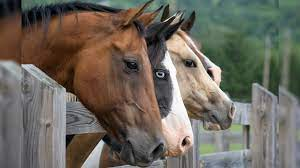
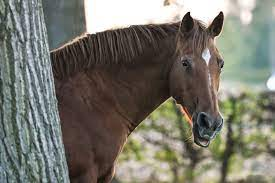
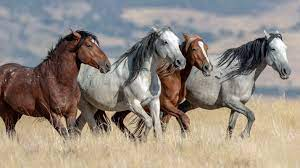

In [51]:
image_urls = set()
for actual_image in actual_images:        
    if actual_image.get_attribute('src'):
        img_res= actual_image.get_attribute('src')
        print (img_res)

        if img_res.startswith('http') and not img_res.startswith('https://encrypted'):
            print ('Found:',img_res)
            image_urls.add(img_res)
            break


In [56]:
fn = 'urls_'+search_term.replace(' ','_')+'.csv'
pd.DataFrame(image_urls).to_csv(fn, index= False)


### Read cached 

In [57]:
# search_term = 'carrots'  # call the carrots in the market then 
fn = 'urls_'+search_term.replace(' ','_')+'.csv'
df = pd.read_csv(fn)
df

,0
0,"https://cdn.britannica.com/s:690x388,c:crop/76..."
1,https://play-lh.googleusercontent.com/OG7Cy_lC...
2,https://thehorse.com/wp-content/uploads/2018/0...
3,https://www.mcdowellsherbal.com/images/Fresian...
4,https://www.wormsandgermsblog.com/files/2020/1...
...,...
95,https://awionline.org/sites/default/files/styl...
96,https://www.treehugger.com/thmb/MiK2D9_B6w3sZc...
97,https://cdn.vox-cdn.com/thumbor/Ox7yGyaB2ut2bx...
98,https://nayturr.com/wp-content/uploads/2020/07...


In [102]:
image_urls= set(df['0'].values)
image_urls

{'http://cdn.cnn.com/cnnnext/dam/assets/200603115813-wild-horses-namibia-cunniffe-1.jpg',
 'http://thepixelnomad.com/wp-content/uploads/2019/08/180922-Budjonny0778.jpg',
 'http://ventured.com/wp-content/uploads/2020/03/The-19-Most-Expensive-Horse-Breeds-In-The-World.jpg',
 'https://awionline.org/sites/default/files/styles/art/public/page/image/horses_flickr_Larry%20Lamsa.jpg?itok=B1vXMiJN',
 'https://awionline.org/sites/default/files/styles/art/public/page/image/pexels-julissa-helmuth-4962458.jpg?itok=Bg19t-Vj',
 'https://bloximages.chicago2.vip.townnews.com/helenair.com/content/tncms/assets/v3/editorial/2/03/20311b8c-4b9f-5d36-83b9-525eee95f955/60b6ce475c5e1.image.jpg?resize=1200%2C762',
 'https://ca-times.brightspotcdn.com/dims4/default/c1ff71d/2147483647/strip/true/crop/3000x1872+0+0/resize/840x524!/quality/90/?url=https%3A%2F%2Fcalifornia-times-brightspot.s3.amazonaws.com%2Ffb%2F5f%2Fbae0ca554b13a1762705950abdaf%2Fap231559439872.jpg',
 'https://cdn.britannica.com/s:690x388,c:crop/7

In [103]:
fn

'urls_horses.csv'

## Review image from collected URL

In [60]:
url= df['0'].values[1]
response = requests.get(url)
response

<Response [200]>

In [61]:
!pip install Pillow

In [62]:
from PIL import Image

In [63]:
im = Image.open(requests.get(url, stream=True).raw)

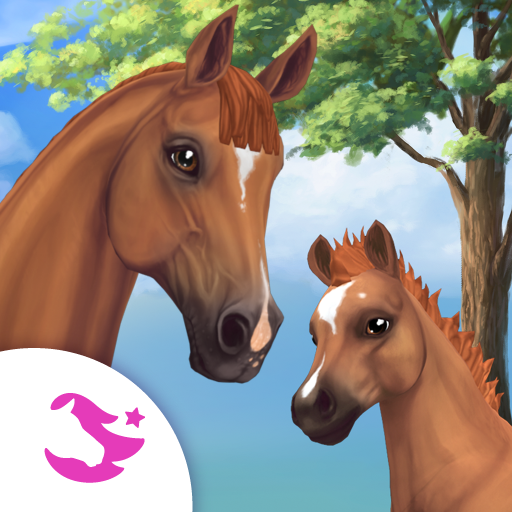

In [64]:
im

## Download images for collected URLs

In [65]:
def download_images(image_urls, target_path='./images',prefix='image'):
    target_folder = os.path.join(target_path,'_'.join(prefix.lower().split(' ')))
    if not os.path.exists(target_folder):
        print  ('Creating:', target_folder)
        os.makedirs(target_folder)
        
    index= 0
    print ('\nDownloading images')
    for elem in image_urls:
        fn = f'{prefix}_{index}'
        download_image(target_folder,elem,fn) 
        index+=1
        print ('Completed: ', index)

def download_image(folder_path:str,url:str, fn:str):
    try: 
        img_data = requests.get(url,timeout=5).content
    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")
    else: 
        file_path = os.path.join(folder_path,fn)
        try:
            with open(f'{file_path}.jpg', 'wb') as handler: # lets save all of them as jpg
                handler.write(img_data)    
        except Exception as e:
              print(f"SUCCESS - saved {url} - as {file_path}")



In [105]:

# prefix= 'banana'
# fn = 'urls_banana.csv'

# prefix= 'lemon'
# fn = 'urls_lemon_fruit.csv'

# prefix= 'onions'
# fn = 'urls_Onions.csv'

# prefix= 'orange'
# fn = 'urls_orange_fruit_in_market.csv'

# prefix= 'patatoes' ### ???
# fn = 'urls_patatoes.csv'

# prefix= 'apple' 
# fn = 'urls_apple_fruit.csv'

# prefix= 'pineapple' 
# fn = 'urls_pineapple_fruit.csv'

# run
# prefix= 'bell_peppers' 
# fn = 'urls_Bell_Peppers_in_the_market.csv'

prefix= 'horses' 
fn = 'urls_horses.csv'

# search_term = 'tomatoes'
# fn = 'urls_'+search_term.replace(' ','_')+'.csv'


df = pd.read_csv(fn)
image_urls= set(df['0'].values)
download_images(image_urls, prefix=prefix)

Creating: ./images/horses

Completed:  1
Completed:  2
Completed:  3
Completed:  4
Completed:  5
Completed:  6
Completed:  7
Completed:  8
Completed:  9
Completed:  10
Completed:  11
Completed:  12
Completed:  13
Completed:  14
Completed:  15
Completed:  16
Completed:  17
Completed:  18
Completed:  19
Completed:  20
Completed:  21
Completed:  22
Completed:  23
Completed:  24
Completed:  25
Completed:  26
Completed:  27
Completed:  28
Completed:  29
Completed:  30
Completed:  31
Completed:  32
Completed:  33
Completed:  34
Completed:  35
Completed:  36
Completed:  37
Completed:  38
Completed:  39
Completed:  40
Completed:  41
Completed:  42
Completed:  43
Completed:  44
Completed:  45
Completed:  46
Completed:  47
Completed:  48
Completed:  49
Completed:  50
Completed:  51
Completed:  52
Completed:  53
Completed:  54
Completed:  55
Completed:  56
Completed:  57
Completed:  58
Completed:  59
Completed:  60
Completed:  61
Completed:  62
Completed:  63
Completed:  64
Completed:  65
Complet

## Review downloaded images 

In [106]:
target_path='./images'
target_folder = os.path.join(target_path,'_'.join(prefix.lower().split(' ')))
target_folder

'./images/horses'

In [107]:
import glob

files = [f for f in glob.glob(target_folder + "**/*.jpg", recursive=True)]
len(files)


100

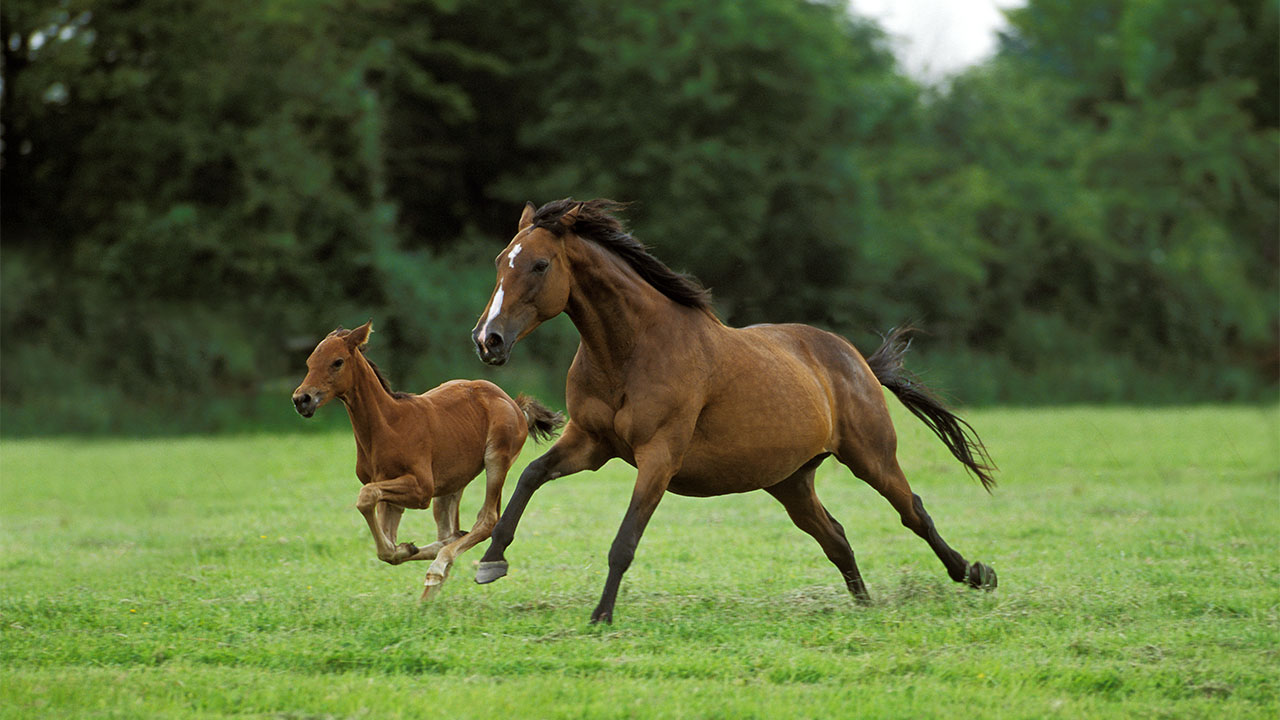

In [108]:
from IPython.display import Image

i= 5
Image(files[i])


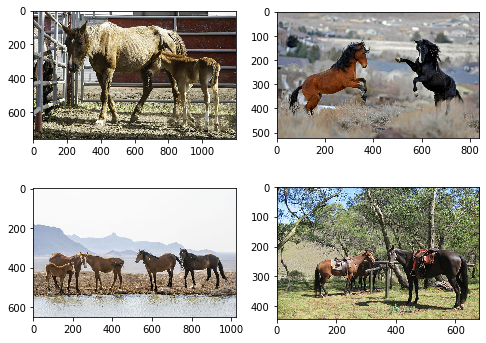

In [109]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np 

def show_samples(files):       
    _, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize= (8,6))
    axes = (ax1, ax2, ax3, ax4)
    for i, ax in  enumerate(axes):
        img = Image.open(files[i])
        ax.imshow(img)

rand_indices= np.random.permutation(len(files))
files_4 = [files[rand_indices[i]] for i in range (4)]        

show_samples(files_4)  

**Note**: Now there are full size images

## Check each image before feeding into model 

In [110]:
from PIL import Image
import io

In [111]:
import glob

In [112]:
def check_images(fp, remove = False):       
    try:
        byteImgIO = io.BytesIO()
        byteImg = Image.open(fp)
    except Exception as e: 
        print(fp)                    
        print ('error:', e)
        if remove:
            os.remove(fp)
            print('removed',fp)                    
        else: 
            print(fp)   


In [113]:

files = [f for f in glob.glob(target_folder + "**/*.*", recursive=True)]
print (len(files))
for fp in files:
    check_images(fp)

100
./images/horses/horses_33.jpg
error: cannot identify image file './images/horses/horses_33.jpg'
./images/horses/horses_33.jpg
./images/horses/horses_21.jpg
error: cannot identify image file './images/horses/horses_21.jpg'
./images/horses/horses_21.jpg
./images/horses/horses_50.jpg
error: cannot identify image file './images/horses/horses_50.jpg'
./images/horses/horses_50.jpg
./images/horses/horses_45.jpg
error: cannot identify image file './images/horses/horses_45.jpg'
./images/horses/horses_45.jpg
./images/horses/horses_56.jpg
error: cannot identify image file './images/horses/horses_56.jpg'
./images/horses/horses_56.jpg
./images/horses/horses_57.jpg
error: cannot identify image file './images/horses/horses_57.jpg'
./images/horses/horses_57.jpg
./images/horses/horses_16.jpg
error: cannot identify image file './images/horses/horses_16.jpg'
./images/horses/horses_16.jpg


##  Remove corrupted images 

Run the following `check_images(fp, remove = True)`

In [116]:
files = [f for f in glob.glob(target_folder + "**/*.*", recursive=True)]
for fp in files:
    check_images(fp, remove=True)

./images/horses/horses_56.jpg
error: cannot identify image file './images/horses/horses_56.jpg'
removed ./images/horses/horses_56.jpg
./images/horses/horses_16.jpg
error: cannot identify image file './images/horses/horses_16.jpg'
removed ./images/horses/horses_16.jpg


/Users/otsebriy/opt/anaconda3/envs/ot_env/lib/python3.7/site-packages/PIL/Image.py:2860: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


## Check after removing 

In [117]:
files = [f for f in glob.glob(target_folder + "**/*.*", recursive=True)]
for fp in files:
    check_images(fp)

[Guide of web scrapping](https://towardsdatascience.com/image-scraping-with-python-a96feda8af2d)